# Linear Discriminant Analysis

From: https://dmbee.github.io/seglearn/auto_examples/plot_lda.html

## Overview

This example demonstrates how the pipeline can be used to perform transformation of time series data, such as linear discriminant analysis for visualization purposes.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # LDA is the one from sklearn. 
# So, we're using seglearn here to get a fixed vectore repr.

import seglearn as sgl

In [3]:
# Plotting helper
def plot_embedding(emb, y, y_labels):
    # plot a 2D feature map embedding
    x_min, x_max = np.min(emb, 0), np.max(emb, 0)
    emb = (emb - x_min) / (x_max - x_min)  # NOTE: min max normalised here!

    NC = len(y_labels)
    markers = ['.', '+', 'x', '|', '_', '*', 'o']

    fig = plt.figure()
    fig.set_size_inches(6, 6)

    for c in range(NC):
        i = y == c
        plt.scatter(emb[i, 0], emb[i, 1], marker=markers[c], label=y_labels[c])

    plt.xticks([]), plt.yticks([])
    plt.legend()
    plt.tight_layout()

In [8]:
# load the data
# ℹ️ Seglearn's provided watch dataset.
data = sgl.load_watch()
X = data['X']
y = data['y']

In [9]:
print("len(X):", len(X))
print("X[0].shape:", X[0].shape)

len(X): 140
X[0].shape: (1333, 6)


In [16]:
print("len(y):", len(y))
print("y[0].shape:", y[0].shape)
print("y unique:", np.unique(y))
# Note 7 possible labels in this dataset.

len(y): 140
y[0].shape: ()
y unique: [0 1 2 3 4 5 6]


In [11]:
# create a pipeline for LDA transformation of the feature representation
# ℹ️ Using Seglearn's own pipeline class- Pype.

clf = sgl.Pype(
    [
        ('segment', sgl.Segment()),  # Will use default width=100, overlap=0.5
        ('ftr', sgl.FeatureRep()),   # Will use the default featires dictionary.
        ('lda', LinearDiscriminantAnalysis(n_components=2))
    ]
)

/mnt/space/miniconda3/envs/py38_playaround-sk/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass memory=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


The default features dict. for `FeatureRep` is:
```python
features = {'mean': mean,
            'median': median,
            'abs_energy': abs_energy,
            'std': std,
            'var': var,
            'min': minimum,
            'max': maximum,
            'skew': skew,
            'kurt': kurt,
            'mse': mse,
            'mnx': mean_crossings}
```

Sources: 
1. https://dmbee.github.io/seglearn/transform.html#seglearn.transform.FeatureRep
2. https://github.com/dmbee/seglearn/blob/746d6c4eb89a338e6366c5be59fb25d1af63477f/seglearn/feature_functions.py#L37

<br/>

**✍🏻🤔 Note:**

Seems like despite the fact that `FeatureRep` doesn't explicitly return `y`, the `Pype` pipeline doesn't lose `y` and passes it along...

In [12]:
X2, y2 = clf.fit_transform(X, y)

/mnt/space/miniconda3/envs/py38_playaround-sk/lib/python3.8/site-packages/seglearn/transform.py:237: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Xt = np.array([sliding_tensor(Xt[i], self.width, self._step, self.order)


In [13]:
print("X2.shape:", X2.shape)
print("y2.shape:", y2.shape)

X2.shape: (4677, 2)
y2.shape: (4677,)


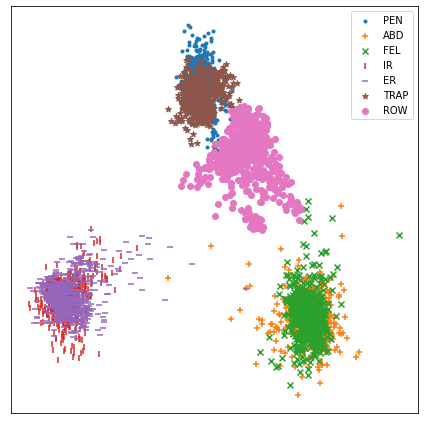

In [14]:
plot_embedding(X2, y2.astype(int), data['y_labels'])
plt.show()